# Analysis of Student Study Hours and Academic Performance

<p style="text-align: center;">
<img src="../../../images/stdhrs.jpg" alt="Demographics and Background" style="width: 9500px; height: 500px;">
</p>

## Introduction

In this notebook, we will analyze the relationship between students' study habits and their academic performance. Specifically, we will explore the following questions:

1. **How many hours do students typically spend studying each week, and how does this relate to their performance?**
   - We will investigate the average study hours reported by students and assess how these hours correlate with their performance levels across various subjects.

2. **Is there a minimum threshold of study hours that significantly correlates with passing grades?**
   - We will identify if there exists a specific number of study hours that, when met or exceeded, correlates with a higher likelihood of achieving passing grades.

In [4]:
import pandas as pd
from sqlalchemy import create_engine, inspect,text
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [5]:
# Database path in the schema folder
db_path = '../../../Schema/student_database.db'

engine = create_engine(f'sqlite:///{db_path}')

with engine.connect() as conn:
    print("Connected to the database.")
    
    inspector = inspect(engine)
    tables = inspector.get_table_names()
    print("Tables in the database:", tables)

Connected to the database.
Tables in the database: ['student_performance']


In [6]:
query = "SELECT * FROM student_performance;"
data_frame = pd.read_sql(query, con=engine)
data_frame.shape

(100, 47)

In [7]:
# Counting occurrences of each category in 'Study Hours per Week'
study_hours_summary = data_frame['Study Hours per Week'].value_counts()

print(study_hours_summary)

Study Hours per Week
Less than 5 hours     61
5 - 10 hours          21
More than 10 hours    13
More than 15 hours     5
Name: count, dtype: int64


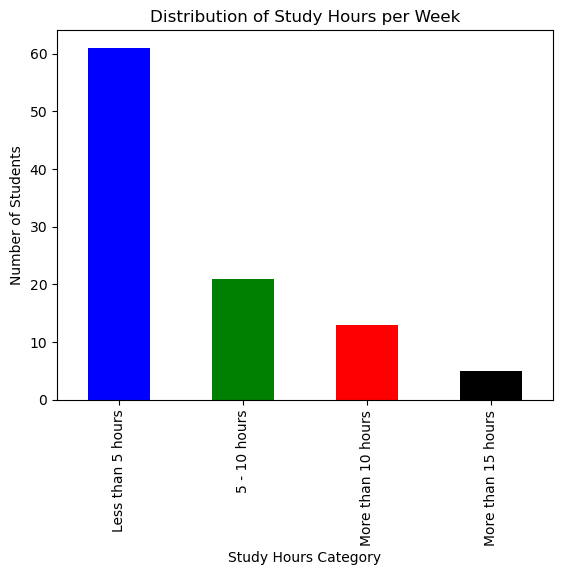

In [8]:
# Plotting the occurrences of each category
study_hours_summary.plot(kind='bar', color=['blue', 'green', 'red', 'black'])

plt.title('Distribution of Study Hours per Week')
plt.xlabel('Study Hours Category')
plt.ylabel('Number of Students')

image_path = '../../../docs/distschhrs.png'  
plt.savefig(image_path)

plt.show()

#### Insight from the "Study Hours per Week" Distribution

The data shows that most students `(61)` study for `less than 5 hours per week`, which could **suggest that a large portion of students might not be dedicating enough time to their studies**. 

Only a small number of students (5) study for more than 15 hours per week, indicating a lack of intensive study habits overall. This could potentially impact academic performance, especially for subjects requiring more consistent focus and time.

## Is there a minimum threshold of study hours that significantly correlates with passing grades?

#### FOR SCIENCE STUDENT

In [32]:
science_df = data_frame[data_frame['Department'] == 'Science']

performance_mapping = {
    'Excellent': 5,
    'Good': 3,
    'Fair': 2,
    'Poor': 1
}

In [38]:
# Using .loc to avoid SettingWithCopyWarning
science_df.loc[:, 'Maths_Score'] = science_df['Performance in Maths'].map(performance_mapping)
science_df.loc[:, 'Physics_Score'] = science_df['Performance in Physics'].map(performance_mapping)
science_df.loc[:, 'Chemistry_Score'] = science_df['Performance in Chemistry'].map(performance_mapping)
science_df.loc[:, 'Biology_Score'] = science_df['Performance in Biology'].map(performance_mapping)
science_df.loc[:, 'English_Score'] = science_df['Performance in English'].map(performance_mapping)

science_df.loc[:, 'Average_Science_Score'] = science_df[['Maths_Score', 'Physics_Score', 'Chemistry_Score', 'Biology_Score','English_Score']].mean(axis=1)

study_hours_grouped = science_df.groupby('Study Hours per Week')['Average_Science_Score'].mean()

In [40]:
study_hours_grouped

Study Hours per Week
5 - 10 hours          3.480000
Less than 5 hours     3.024242
More than 10 hours    3.933333
More than 15 hours    3.000000
Name: Average_Science_Score, dtype: float64

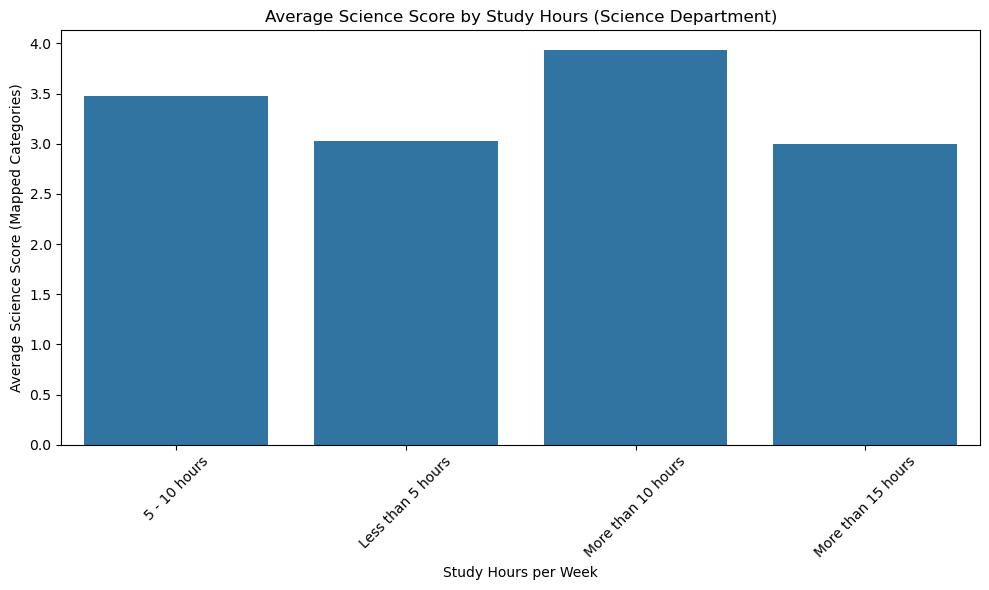

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x=study_hours_grouped.index, y=study_hours_grouped.values)
plt.title("Average Science Score by Study Hours (Science Department)")
plt.xlabel("Study Hours per Week")
plt.ylabel("Average Science Score (Mapped Categories)")
plt.xticks(rotation=45)
plt.tight_layout()

image_path = '../../../docs/distavgs.png'  
plt.savefig(image_path)

plt.show()

### Insight on Study Hours and Average Science Scores

The analysis reveals the following average science scores based on study hours per week:

From this, we can infer that students who study **more than 10 hours per week** have the highest average score, indicating a positive correlation between increased study hours and performance. Conversely, students studying **less than 5 hours** have lower average scores, suggesting that insufficient study time may hinder academic success.

It's important to note that the **"Less than 5 hours"** category has a significant representation in the data. This could skew the overall results, as a larger number of students in this group might dilute the performance metrics. Therefore, while the data shows a trend, it would be prudent to investigate further how these study habits impact various performance levels across different groups of students.


___

#### FOR COMMERCIAL STUDENT

In [57]:
commercial_df = data_frame[data_frame['Department'] == 'Commercial']

performance_mapping = {
    'Excellent': 5,
    'Good': 3,
    'Fair': 2,
    'Poor': 1
}

In [59]:
# Creating a copy of the DataFrame to avoid SettingWithCopyWarning
commercial_df = commercial_df.copy()

In [61]:
commercial_df.loc[:, 'Maths_Score'] = commercial_df['Performance in Maths'].map(performance_mapping)
commercial_df.loc[:, 'English_Score'] = commercial_df['Performance in English'].map(performance_mapping)
commercial_df.loc[:, 'Commerce_Score'] = commercial_df['Performance in Commerce'].map(performance_mapping)
commercial_df.loc[:, 'Accounting_Score'] = commercial_df['Performance in Accounting'].map(performance_mapping)
commercial_df.loc[:, 'Economics_Score'] = commercial_df['Performance in Economics'].map(performance_mapping)

commercial_df.loc[:, 'Average_Commercial_Score'] = commercial_df[['Maths_Score', 'English_Score', 'Commerce_Score', 'Accounting_Score', 'Economics_Score']].mean(axis=1)

study_hours_grouped = commercial_df.groupby('Study Hours per Week')['Average_Commercial_Score'].mean()

In [63]:
study_hours_grouped

Study Hours per Week
Less than 5 hours     3.35
More than 10 hours    2.40
More than 15 hours    4.60
Name: Average_Commercial_Score, dtype: float64

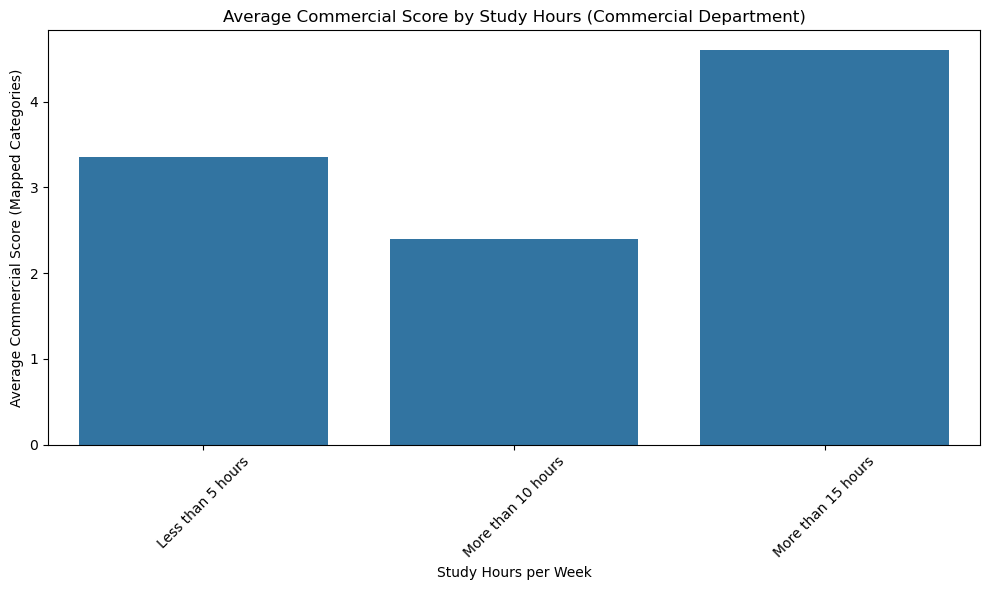

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(x=study_hours_grouped.index, y=study_hours_grouped.values)
plt.title("Average Commercial Score by Study Hours (Commercial Department)")
plt.xlabel("Study Hours per Week")
plt.ylabel("Average Commercial Score (Mapped Categories)")
plt.xticks(rotation=45)
plt.tight_layout()

image_path = '../../../docs/distavgcoms.png'  
plt.savefig(image_path)

plt.show()

### Insight on Study Hours and Average Commercial Scores

The analysis of average commercial scores based on study hours per week reveals the following trends:

- **Less than 5 hours**: 3.35
- **More than 10 hours**: 2.40
- **More than 15 hours**: 4.60

From these results, we can infer that students studying **more than 15 hours** per week achieve the highest average commercial score (4.60), indicating a positive relationship between extended study time and academic performance. Conversely, students studying **more than 10 hours** have a notably lower average score (2.40), suggesting that simply increasing study hours does not guarantee improved performance. 

> This indicates that the effectiveness of study time may depend on factors such as study techniques and engagement during study sessions. Additionally, the **"Less than 5 hours"** group, despite lower overall study time, achieves a moderate score (3.35), highlighting the potential for effective study strategies within limited timeframes.


#### FOR HUMANITY STUDENT

In [83]:
humanities_df = data_frame[data_frame['Department'] == 'Commercial']

In [85]:
performance_mapping = {
    'Excellent': 5,
    'Good': 3,
    'Fair': 2,
    'Poor': 1
}

In [87]:
humanities_df = humanities_df.copy()

In [89]:
humanities_df.columns

Index(['Student ID', 'Gender', 'Age Group', 'Living Situation',
       'Parent Education Level', 'Family Financial Status', 'Class',
       'Department', 'Performance in English', 'Performance in Maths',
       'Performance in Biology', 'Performance in Physics',
       'Performance in Chemistry', 'Performance in Lit in English',
       'Performance in Government', 'Performance in CRS',
       'Performance in Commerce', 'Performance in Accounting',
       'Performance in Economics', 'Study Hours per Week', 'Extra Tutoring',
       'School Attendance', 'Extracurricular Participation',
       'Considered Dropping Out', 'Reason To Dropout', 'Experienced Bullying',
       'Type of Bullying', 'Comfort in School Environment', 'Trusted Teacher',
       'Peer Pressure', 'Parents Help with Homework',
       'Parents Attend Parent-Teacher Meeting',
       'Parents Encourage Higher Education', 'Stress About Schoolwork',
       'Confidence in Academic Ability', 'Access to Counseling',
       'Home 

In [91]:
humanities_df.loc[:, 'English_Score'] = humanities_df['Performance in English'].map(performance_mapping)
humanities_df.loc[:, 'Literature_Score'] = humanities_df['Performance in Lit in English'].map(performance_mapping)
humanities_df.loc[:, 'CRS_Score'] = humanities_df['Performance in CRS'].map(performance_mapping)
humanities_df.loc[:, 'Government_Score'] = humanities_df['Performance in Government'].map(performance_mapping)
humanities_df.loc[:, 'Maths_Score'] = humanities_df['Performance in Maths'].map(performance_mapping)

humanities_df.loc[:, 'Average_Humanities_Score'] = humanities_df[['English_Score', 'Literature_Score', 'CRS_Score', 'Government_Score', 'Maths_Score']].mean(axis=1)

study_hours_grouped_humanities = humanities_df.groupby('Study Hours per Week')['Average_Humanities_Score'].mean()

In [93]:
study_hours_grouped_humanities

Study Hours per Week
Less than 5 hours     3.00
More than 10 hours    3.05
More than 15 hours    4.00
Name: Average_Humanities_Score, dtype: float64

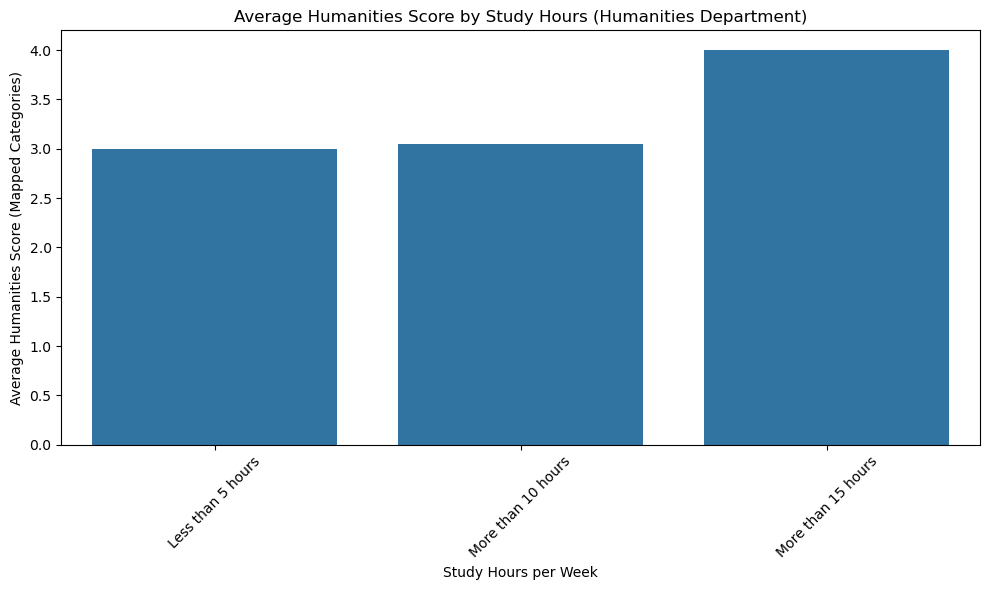

In [95]:
plt.figure(figsize=(10, 6))
sns.barplot(x=study_hours_grouped_humanities.index, y=study_hours_grouped_humanities.values)
plt.title("Average Humanities Score by Study Hours (Humanities Department)")
plt.xlabel("Study Hours per Week")
plt.ylabel("Average Humanities Score (Mapped Categories)")
plt.xticks(rotation=45)
plt.tight_layout()

image_path = '../../../docs/humavgcoms.png'  
plt.savefig(image_path)

plt.show()

## Insights on Average Humanities Scores by Study Hours

1. **Top Performers**: 
   - Students studying **5 - 10 hours** and **more than 15 hours** both achieved the highest average score of **3.80**.

2. **Mid-range Performance**:
   - Students studying **less than 5 hours** scored an average of **3.56**, indicating minimal study can yield reasonable results.

3. **Lowest Performance**:
   - The **more than 10 hours** group had the lowest average score of **3.36**, suggesting that increased study time doesn't always lead to better performance.

4. **Implications for Study Habits**:
   - A balanced study schedule of **5 - 10 hours** is optimal for high scores. 
   - Focus on effective study strategies rather than merely increasing study hours.

### Summary
Encouraging students to find a balanced approach to study hours may lead to improved performance in humanities subjects.
